In [1]:
import pandas as p
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data=p.read_csv('loans_full_schema.csv')
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
data.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [4]:
#we will create a dataframe which will contain all the columns we will be using for machine learning
cleaned=data.copy()

In [5]:
cleaned.shape

(10000, 55)

In [6]:
cleaned=cleaned.drop(['issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees','emp_title','emp_length','months_since_90d_late','months_since_last_delinq'\
             ,'verification_income_joint','debt_to_income_joint','num_accounts_120d_past_due','term', 'installment'],axis=1)

In [7]:
cleaned.shape

(10000, 37)

In [8]:
#data.debt_to_income.median()

In [9]:
#data[~data.annual_income_joint.isna()][['annual_income','annual_income_joint']]

In [10]:
#cleaned['combined_annual_income']
# n.max(cleaned['annual_income'],cleaned['annual_income_joint'])
#cleaned[['annual_income','annual_income_joint']].max(axis=1)

In [11]:
cleaned['annual_income']=cleaned[['annual_income','annual_income_joint']].max(axis=1)

In [12]:
cleaned=cleaned.drop(['annual_income_joint'],axis=1)
cleaned.shape

(10000, 36)

In [13]:
cleaned.columns

Index(['state', 'homeownership', 'annual_income', 'verified_income',
       'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'interest_rate',
       'grade', 'sub_grade'],
      dtype='object')

In [14]:
# now we split our data into train and test
y=cleaned['interest_rate'].values
X=cleaned.drop(['interest_rate'],axis=1)

train, test = train_test_split(cleaned, test_size=0.2)

In [15]:
#cleaned['debt_to_income']=cleaned['debt_to_income'].fillna(cleaned['debt_to_income'].median())
train['debt_to_income']=train['debt_to_income'].fillna(train['debt_to_income'].median())
test['debt_to_income']=test['debt_to_income'].fillna(train['debt_to_income'].median())

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/3380610924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['debt_to_income']=train['debt_to_income'].fillna(train['debt_to_income'].median())
/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/3380610924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['debt_to_income']=test['debt_to_income'].fillna(train['debt_to_income'].median())


In [16]:
train.to_csv('train.csv')

In [17]:
train['months_since_last_credit_inquiry']=["less than 3" if i<=3 \
        else "between 4 and 8" if i<=8 else "between 9 and 19" if i<=19 \
        else "greater than 19" for i in train['months_since_last_credit_inquiry']]

test['months_since_last_credit_inquiry']=["less than 3" if i<=3 \
        else "between 4 and 8" if i<=8 else "between 9 and 19" if i<=19 \
        else "greater than 19" for i in test['months_since_last_credit_inquiry']]



/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/2338399282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['months_since_last_credit_inquiry']=["less than 3" if i<=3 \
/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/2338399282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['months_since_last_credit_inquiry']=["less than 3" if i<=3 \


In [18]:
median_by_state=train.groupby('state').interest_rate.median()
train['median_of_state']=train.state.map(median_by_state)
test['median_of_state']=test.state.map(median_by_state)

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/1323747167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['median_of_state']=train.state.map(median_by_state)
/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/1323747167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['median_of_state']=test.state.map(median_by_state)


In [19]:
train['state_categories']=["less than 10.5" if i<10.5 else "between 10.5 and 11" if i<11 else\
                             "between 11 and 11.5" if i<11.5 else "between 11.5 and 12" if i<12 else\
                            "between 12 and 13" if i<13 else "more than 13" for i in train['median_of_state']]

test['state_categories']=["less than 10.5" if i<10.5 else "between 10.5 and 11" if i<11 else\
                             "between 11 and 11.5" if i<11.5 else "between 11.5 and 12" if i<12 else\
                            "between 12 and 13" if i<13 else "more than 13" for i in test['median_of_state']]

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/613116810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['state_categories']=["less than 10.5" if i<10.5 else "between 10.5 and 11" if i<11 else\
/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/613116810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['state_categories']=["less than 10.5" if i<10.5 else "between 10.5 and 11" if i<11 else\


## Target encoding

In [20]:
#cleaned[['state','median_of_state','state_categories']]
# cleaned=cleaned.drop(['state','median_of_state'],axis=1)
# cleaned.info()

In [21]:
#data.homeownership.value_counts()

In [22]:
#train.groupby('homeownership').interest_rate.mean()

In [23]:
#train.groupby('verified_income').interest_rate.mean()

In [24]:
#cleaned.groupby('months_since_last_credit_inquiry').interest_rate.mean()

In [25]:
#cleaned.groupby('loan_purpose').interest_rate.mean()

In [26]:
#cleaned.groupby('grade').interest_rate.mean()

In [27]:
#cleaned.groupby('sub_grade').interest_rate.mean()

In [28]:
#cleaned.groupby('state_categories').interest_rate.mean()

In [29]:
#cleaned.groupby('application_type').interest_rate.mean()

In [30]:
def target_encoding(feature):
    t=train.groupby(feature).interest_rate.mean()
    train[feature+"_encoded"]=train[feature].map(t)
    test[feature+"_encoded"]=test[feature].map(t)

In [31]:
target_encoding('homeownership')
target_encoding('verified_income')
target_encoding('months_since_last_credit_inquiry')
target_encoding('loan_purpose')
target_encoding('grade')
target_encoding('sub_grade')
target_encoding('state_categories')
target_encoding('application_type')

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/1799030687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[feature+"_encoded"]=train[feature].map(t)
/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_19666/1799030687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[feature+"_encoded"]=test[feature].map(t)


In [32]:
train=train.drop(['homeownership','verified_income','months_since_last_credit_inquiry',\
                     'loan_purpose','grade','sub_grade','state_categories','application_type','state'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9941 to 1219
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   annual_income                             8000 non-null   float64
 1   debt_to_income                            8000 non-null   float64
 2   delinq_2y                                 8000 non-null   int64  
 3   earliest_credit_line                      8000 non-null   int64  
 4   inquiries_last_12m                        8000 non-null   int64  
 5   total_credit_lines                        8000 non-null   int64  
 6   open_credit_lines                         8000 non-null   int64  
 7   total_credit_limit                        8000 non-null   int64  
 8   total_credit_utilized                     8000 non-null   int64  
 9   num_collections_last_12m                  8000 non-null   int64  
 10  num_historical_failed_to_pay     

In [33]:
test=test.drop(['homeownership','verified_income','months_since_last_credit_inquiry',\
                     'loan_purpose','grade','sub_grade','state_categories','application_type','state'],axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8027 to 2549
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   annual_income                             2000 non-null   float64
 1   debt_to_income                            2000 non-null   float64
 2   delinq_2y                                 2000 non-null   int64  
 3   earliest_credit_line                      2000 non-null   int64  
 4   inquiries_last_12m                        2000 non-null   int64  
 5   total_credit_lines                        2000 non-null   int64  
 6   open_credit_lines                         2000 non-null   int64  
 7   total_credit_limit                        2000 non-null   int64  
 8   total_credit_utilized                     2000 non-null   int64  
 9   num_collections_last_12m                  2000 non-null   int64  
 10  num_historical_failed_to_pay     

### Now we will split in train X, train y, test X, test y

In [34]:
y_train=train['interest_rate'].values
X_train=train.drop(['interest_rate'],axis=1)

y_test=test['interest_rate'].values
X_test=test.drop(['interest_rate'],axis=1)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9941 to 1219
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   annual_income                             8000 non-null   float64
 1   debt_to_income                            8000 non-null   float64
 2   delinq_2y                                 8000 non-null   int64  
 3   earliest_credit_line                      8000 non-null   int64  
 4   inquiries_last_12m                        8000 non-null   int64  
 5   total_credit_lines                        8000 non-null   int64  
 6   open_credit_lines                         8000 non-null   int64  
 7   total_credit_limit                        8000 non-null   int64  
 8   total_credit_utilized                     8000 non-null   int64  
 9   num_collections_last_12m                  8000 non-null   int64  
 10  num_historical_failed_to_pay     

### Wrapping techniques

In [36]:
# clf=RandomForestRegressor(n_estimators=5,n_jobs=-1)
# sfs=SFS(clf,n_features_to_select=35,direction="forward",scoring="neg_mean_squared_error",cv=2,n_jobs=-1)
# sfs.fit(X_train,y_train)

In [37]:
X_train.columns

Index(['annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'median_of_state', 'homeownership_encoded',
       'verified_income_encoded', 'months_since_last_credit_inquiry_encoded',
       'loan_purpose_encoded', 'grade_encoded', 'sub_grade_encoded',
       'state_categories_encoded', 'application_type_encoded'],
      dtype=

In [38]:
clf=RandomForestRegressor(n_estimators=5,n_jobs=-1)
clf2=LinearRegression()
sfs=SFS2(clf,k_features=35,forward=True,verbose=2,scoring="neg_root_mean_squared_error",cv=2,n_jobs=-1)
sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.6s finished

[2022-04-11 21:30:01] Features: 1/35 -- score: -0.22284406013744074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished

[2022-04-11 21:30:02] Features: 2/35 -- score: -0.2229705720763447[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished

[2022-04-11 21:30:02] Features: 3/35 -- score: -0.22287308032365027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  33 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2022-04-11 21:30:02] Features: 4/35 -- score: -0.22313235629130632[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 conc

[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished

[2022-04-11 21:30:14] Features: 30/35 -- score: -0.24191679745025918[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished

[2022-04-11 21:30:14] Features: 31/35 -- score: -0.2541659134348261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2022-04-11 21:30:15] Features: 32/35 -- score: -0.23756263256437585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestRegressor(n_estimators=5,
                                                          n_jobs=-1),
                          k_features=35, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', verbose=2)

In [39]:
# import sklearn.metrics
# sklearn.metrics.SCORERS.keys()
sfs.get_metric_dict()

{1: {'feature_idx': (33,),
  'cv_scores': array([-0.20992778, -0.23576034]),
  'avg_score': -0.22284406013744074,
  'feature_names': ('sub_grade_encoded',),
  'ci_bound': 0.05557426606898726,
  'std_dev': 0.012916279690118812,
  'std_err': 0.012916279690118812},
 2: {'feature_idx': (25, 33),
  'cv_scores': array([-0.20935671, -0.23658444]),
  'avg_score': -0.2229705720763447,
  'feature_names': ('public_record_bankrupt', 'sub_grade_encoded'),
  'ci_bound': 0.058575733834772034,
  'std_dev': 0.013613865099445274,
  'std_err': 0.013613865099445274},
 3: {'feature_idx': (25, 32, 33),
  'cv_scores': array([-0.20913404, -0.23661212]),
  'avg_score': -0.22287308032365027,
  'feature_names': ('public_record_bankrupt',
   'grade_encoded',
   'sub_grade_encoded'),
  'ci_bound': 0.059114311200159995,
  'std_dev': 0.013739038428364866,
  'std_err': 0.013739038428364865},
 4: {'feature_idx': (11, 25, 32, 33),
  'cv_scores': array([-0.21006728, -0.23619744]),
  'avg_score': -0.22313235629130632,
  

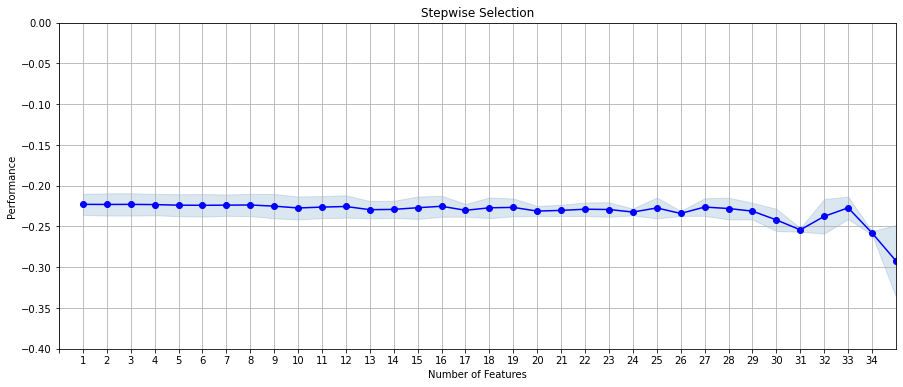

In [40]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev', figsize=(15, 6))
plt.xticks(n.arange(0, 35, step=1))
plt.ylim([-0.4, 0])
plt.xlim(0,35)
plt.title('Stepwise Selection')
plt.grid()
plt.savefig('FS_fdr.png')
plt.show()

In [41]:
#sfs.get_support()

In [42]:
#sfs.transform(X_train)

In [43]:
sfs.get_metric_dict()[9]['feature_names']

('num_historical_failed_to_pay',
 'current_accounts_delinq',
 'num_accounts_30d_past_due',
 'tax_liens',
 'public_record_bankrupt',
 'grade_encoded',
 'sub_grade_encoded',
 'state_categories_encoded',
 'application_type_encoded')

In [44]:
select=sfs.get_metric_dict()[9]['feature_names']
select

('num_historical_failed_to_pay',
 'current_accounts_delinq',
 'num_accounts_30d_past_due',
 'tax_liens',
 'public_record_bankrupt',
 'grade_encoded',
 'sub_grade_encoded',
 'state_categories_encoded',
 'application_type_encoded')

In [45]:
X_train=X_train[list(select)]
X_test=X_test[list(select)]

### Apply machine learning models
#### Linear Regression

In [59]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
pred=model.predict(X_test)

In [61]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, pred))
rms

0.07619770302560576

In [62]:
pred

array([22.90790555,  6.7149442 , 10.41725291, ..., 13.59746763,
       16.01958993, 13.58676675])

In [63]:
y_test

array([22.91,  6.71, 10.41, ..., 13.59, 16.01, 13.58])

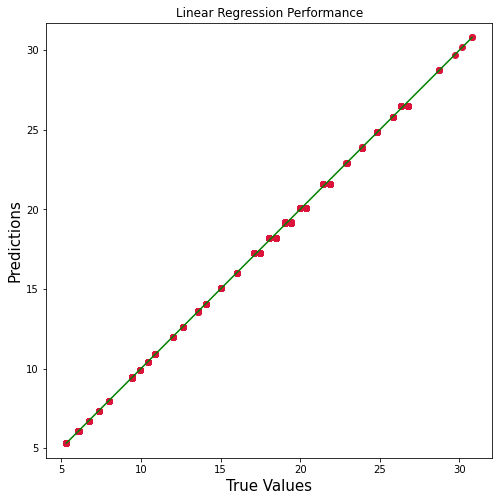

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Linear Regression Performance")
plt.show()

#### Random Forest Regressor

In [66]:
model=RandomForestRegressor(n_estimators=7,n_jobs=-1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [67]:
rms = sqrt(mean_squared_error(y_test, pred))
rms

0.0798899234021915

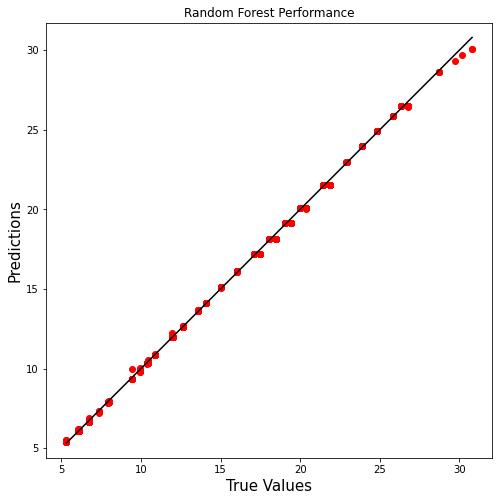

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, pred, c='red')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Random Forest Performance")
plt.show()

### SVR

In [70]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [71]:
rms = sqrt(mean_squared_error(y_test, pred))
rms

0.10560036828993627

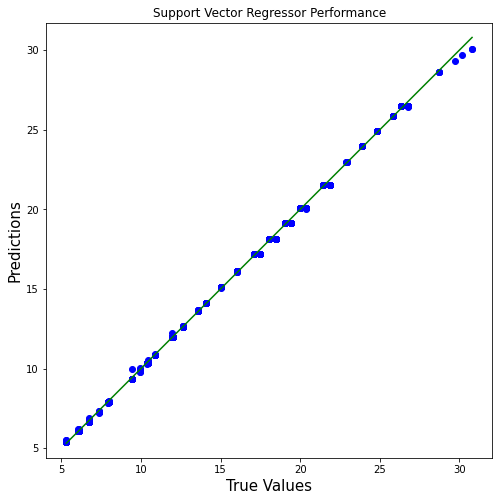

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, pred, c='blue')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Support Vector Regressor Performance')
plt.show()